In [17]:
# Handy Matplotlib tools
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

In [19]:
# Import Python functions from Lecture 1
import lecture

In [20]:
log = lecture._setup_logging()

In [21]:
dataset, dataloader = lecture.load_mnist()

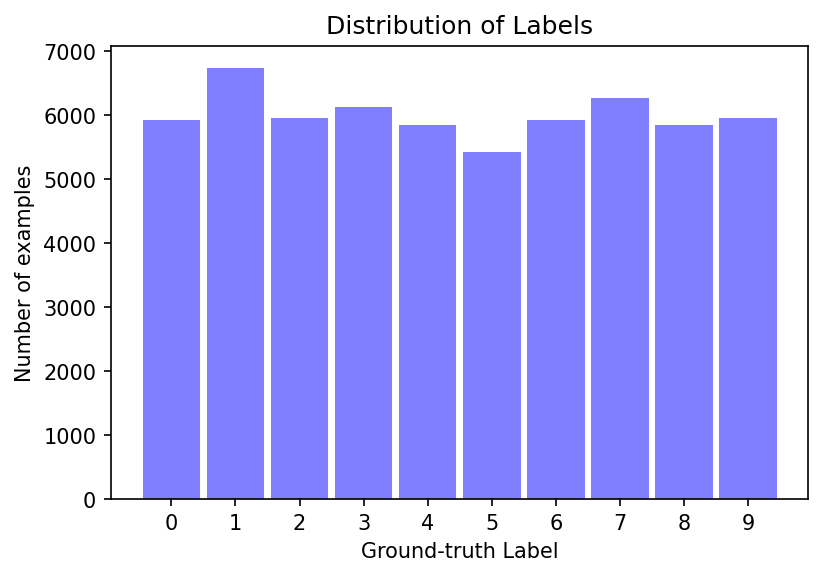

In [22]:
lecture.show_label_histogram(dataset)

In [23]:
datas, labels = next(iter(dataloader))
batch = list(zip(datas, labels))

# Grab the first (data, label) pair from the zipped list
example = batch[0]
data, label = example

In [24]:
data

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

[13:54:34] INFO     [lecture_1] Writing data to disk:                                                ]8;id=296695;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py\642959699.py]8;;\:]8;id=171429;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py#2\2]8;;\

           INFO     [lecture_1]     shape: (1, 28, 28)                                               ]8;id=364735;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py\642959699.py]8;;\:]8;id=552693;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py#3\3]8;;\

           INFO     [lecture_1]     dtype: float32                                                   ]8;id=24460;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py\642959699.py]8;;\:]8;id=729926;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py#4\4]8;;\

           INFO     [lecture_1]     min:   0.0                                                       ]8;id=616278;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py\642959699.py]8;;\:]8;id=703882;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py#5\5]8;;\

           INFO     [lecture_1]     max:   1.0                                                       ]8;id=859356;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py\642959699.py]8;;\:]8;id=880015;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py#6\6]8;;\

           INFO     [lecture_1]     label: 5                                                         ]8;id=571478;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py\642959699.py]8;;\:]8;id=127930;file:///var/folders/kv/32038n4n50gddx2yrrsr_lf80000gn/T/ipykernel_51721/642959699.py#7\7]8;;\

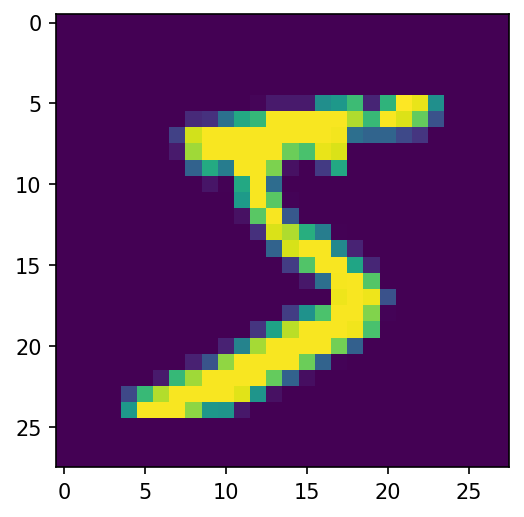

In [25]:
data_np = data.numpy()
log.info('Writing data to disk:')
log.info(f'\tshape: {data_np.shape}')
log.info(f'\tdtype: {data_np.dtype}')
log.info(f'\tmin:   {np.min(data_np)}')
log.info(f'\tmax:   {np.max(data_np)}')
log.info(f'\tlabel: {label}')

# Transpose C,W,H to W,H,C for OpenCV
data_np = np.transpose(data_np, (1, 2, 0))

# Convert range from [0.0, 1.0] to [0, 255]
data_np = data_np * 255.0

# Round to nearest whole number
data_np = np.around(data_np)

# Truncate negative numbers
data_np[data_np < 0] = 0

# Truncate out-of-bounds numbers
data_np[data_np > 255] = 255

# Convert from existing np.float32 to np.uint8 (unsigned 8-bit integer)
data_np = data_np.astype(np.uint8)

plt.imshow(data_np)